In [2170]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import statsmodels.api as sm
from scipy.optimize import curve_fit

In [2171]:
#### Open File for reading and divide up by country and aspect (GDP or Life Expectancy) using the prod_data function
#### Also find relationship (in terms of slope) between GDP and Life Expectancy based on slope_determination function
#### for each country for use to determine how this relationship changes for different GDP values.

In [2172]:
data_life = pd.read_csv("all_data.csv")
data_life['GDP ($}/1e9'] = data_life.GDP/1e10

### Divide data by country and variable
def proc_data(country,aspect):
    info=data_life[data_life.Country==country]
    variable=info[aspect]
    return variable

### Slope for Last Figure
def slope_determination(country,gdp,life_expectancy):
    model = sm.OLS.from_formula('life_expectancy ~ gdp', data = data_life[data_life.Country==country])
    results = model.fit()
    slope=results.params.iloc[1]
    return slope

### Define Paramaters
#China
china_life=proc_data('China','Life expectancy at birth (years)')
china_gdp=proc_data('China','GDP')
china_slope=slope_determination('China',china_gdp/1e9,china_life)
#Chile
chile_life=proc_data('Chile','Life expectancy at birth (years)')
chile_gdp=proc_data('Chile','GDP')
chile_slope=slope_determination('Chile',chile_gdp/1e9,chile_life)
#Germany
germany_life=proc_data('Germany','Life expectancy at birth (years)')
germany_gdp=proc_data('Germany','GDP')
germany_slope=slope_determination('Germany',germany_gdp/1e9,germany_life)
#Mexico
mexico_life=proc_data('Mexico','Life expectancy at birth (years)')
mexico_gdp=proc_data('Mexico','GDP')
mexico_slope=slope_determination('Mexico',mexico_gdp/1e9,mexico_life)
#United States
us_life=proc_data('United States of America','Life expectancy at birth (years)')
us_gdp=proc_data('United States of America','GDP')
us_slope=slope_determination('United States of America',us_gdp/1e9,us_life)
#Zimbabwe
zimbabwe_life=proc_data('Zimbabwe','Life expectancy at birth (years)')
zimbabwe_gdp=proc_data('Zimbabwe','GDP')
zimbabwe_slope=slope_determination('Zimbabwe',zimbabwe_gdp/1e9,zimbabwe_life)

### Make Parameter Arrays for Last Figure
slope_list = [zimbabwe_slope,chile_slope,mexico_slope,germany_slope,china_slope,us_slope]
gdp_list = [np.mean(zimbabwe_gdp/1e9),np.mean(chile_gdp/1e9),np.mean(mexico_gdp/1e9),np.mean(germany_gdp/1e9),np.mean(china_gdp/1e9),np.mean(us_gdp/1e9)]
country_list = ['Zimbabwe','Chile','Mexico','Germany','China','United States']


In [2173]:
#### Plot the figure

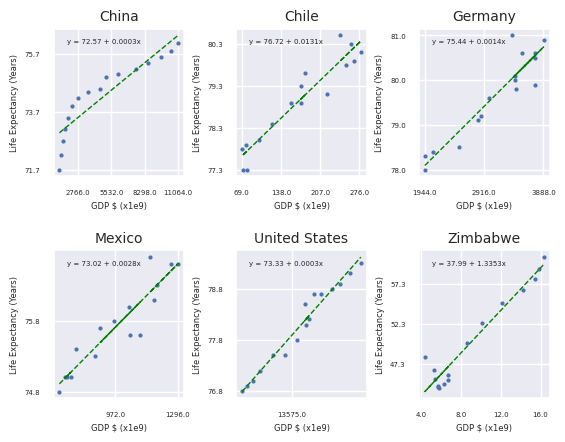

In [2174]:
def plot_graph(gdp,life,col_ind,row_ind,name):
    ax[col_ind,row_ind].scatter(gdp,life,4)
    ax[col_ind,row_ind].set_title(name, size=10)
    ax[col_ind,row_ind].set_xlabel('GDP $ (x1e9)',size=6)
    ax[col_ind,row_ind].set_ylabel('Life Expectancy (Years)',size=6)
    x_interval = int((np.max(gdp))/4)
    y_interval = int(((np.max(life)+2) - (np.min(life)-2))/4)
    ax[col_ind,row_ind].set_xticks(np.arange(0, max(gdp), x_interval))
    ax[col_ind,row_ind].set_xticklabels(np.arange(0, max(gdp),x_interval),fontsize=5)
    ax[col_ind,row_ind].set_yticks(np.arange(min(life)-2,max(life)+3,y_interval))
    ax[col_ind,row_ind].set_yticklabels(np.arange(min(life)-2,max(life)+3,y_interval),fontsize=5)
    a, b = np.polyfit(gdp, life, 1)
    ax[col_ind,row_ind].plot(gdp, a*gdp+b, color='green', linestyle='--', linewidth=1)
    ax[col_ind,row_ind].text(0.1,0.9,'y = ' + '{:.2f}'.format(b) + ' + {:.4f}'.format(a) + 'x',transform=ax[col_ind,row_ind].transAxes, fontsize=5)

fig, ax = plt.subplots(2,3)

row=0
col=0
for name in ["China","Chile","Germany","Mexico","United States","Zimbabwe"]:
    if(name == "China"):
        gdp=china_gdp/1e9
        life=china_life
    elif(name == "Chile"):
        gdp=chile_gdp/1e9
        life=chile_life
    elif(name == "Germany"):
        gdp=germany_gdp/1e9
        life=germany_life
    elif(name == "Mexico"):
        gdp=mexico_gdp/1e9
        life=mexico_life
    elif(name == "United States"):
        gdp=us_gdp/1e9
        life=us_life
    elif(name == "Zimbabwe"):
        gdp=zimbabwe_gdp/1e9
        life=zimbabwe_life
         
    plot_graph(gdp,life,col,row,name)
    row=row+1
    if(row > 2):
        row=0
        col=col+1
plt.subplots_adjust(wspace=0.4,hspace=0.5)

   
    





In [2175]:
# The change life expectancy and with change in GDP is quite small for China, Chile, Germany, Mexico
# and the United States with the United States having the least change in life expectancy for increase in GDP.  Zimbabwe 
# with the lowest GDP has the greatest change in life expectancy for change in GDP along with Chile.
# Nevertheless correlation coefficients are quite high for all indvidual countries strong relationships between GDP and life expectancy
# among each individual country.

<Axes: xlabel='GDP ($}/1e9', ylabel='Life expectancy at birth (years)'>

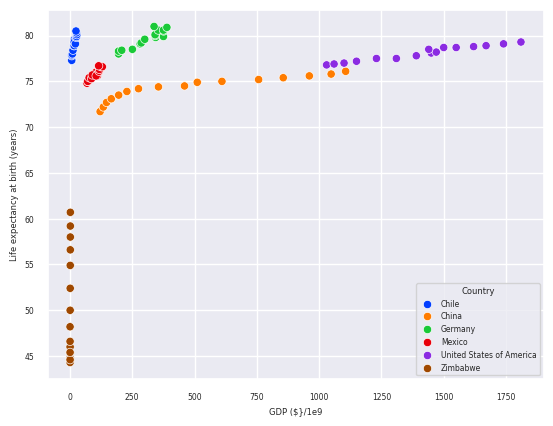

In [2176]:
sns.scatterplot(x = 'GDP ($}/1e9', y = 'Life expectancy at birth (years)', hue = 'Country', palette = 'bright', data = data_life)

In [2177]:
# It looks like above that we see an overall correlation between countries between GDP and Life Expectancy. 
# However we see cdountries like Chile, Mexico, and Germany with low GDP have high life expectancies which makes
# this correlation not so clear cut.  Other factors between countries could impact life expectancies.  
# We do see that Zimbabwe has both low life expectancy and GDP and the United States has high life expectancies 
# and some of the highest GDP values.   Looking at other variables including population for each country, which could give a 
# GDP per capita and also general happiness, amount of vacation time people take, hours worked should also be analyzed to get a better picture
# of what extent GDP could be used to predict life expectancy.

<Axes: xlabel='Country', ylabel='GDP ($}/1e9'>

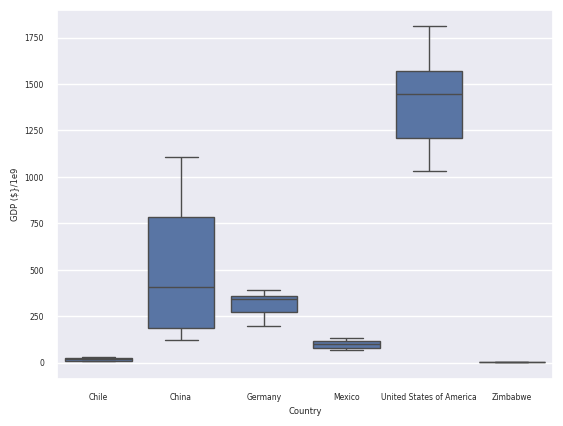

In [2178]:
### Box Plots
sns.set(font_scale=0.5)
sns.boxplot(x = 'Country', y = 'GDP ($}/1e9', data=data_life)



<Axes: xlabel='Country', ylabel='Life expectancy at birth (years)'>

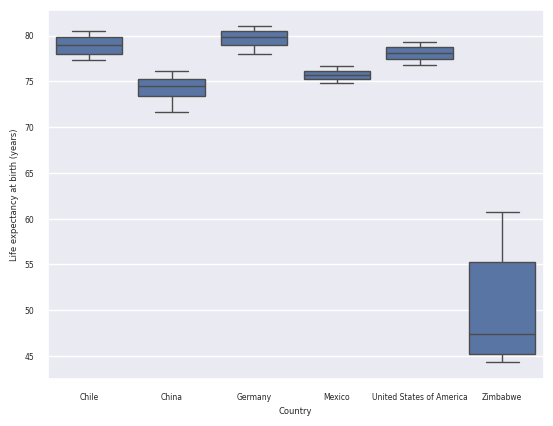

In [2179]:
sns.boxplot(x = 'Country', y = 'Life expectancy at birth (years)', data=data_life)

In [2180]:
# This inconsistancies between GDP and Life Expectancies are shown in the above box and whisker plots where we see Chile and Germany
# having around the same life expectancy as the Unites States despite having significantly lower GDP values than the United States.  
# The same also applies to Germany.  It appears as though Chile and Zimbabwe which have the highest changes in life expectancy 
# with changes in GDP have the lowest GDP while the United Staes with the highest GDP has relatively minimal change in life expectancy
# for change in GDP.

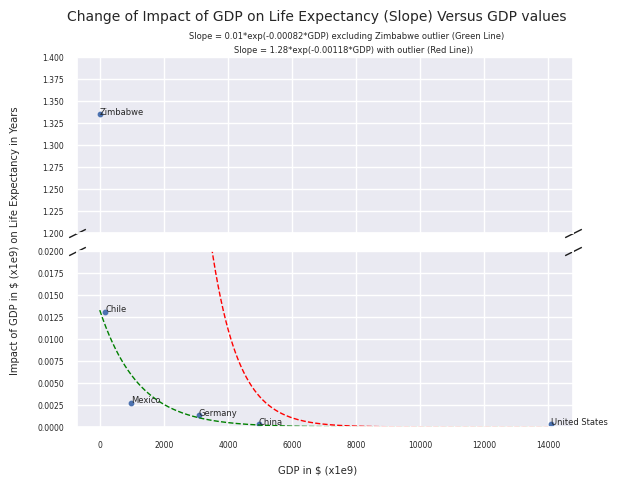

In [2181]:
fig, (ax1, ax2) = plt.subplots(2,1, sharex=True)
fig.subplots_adjust(hspace=0.1)
ax1.scatter(gdp_list,slope_list,10)
ax2.scatter(gdp_list,slope_list,10)

### Country Text
for i, txt in enumerate(country_list):
    ax1.annotate(txt, (gdp_list[i], slope_list[i]))
    ax2.annotate(txt, (gdp_list[i], slope_list[i]))
ax1.set_ylim(1.2,1.4)
ax2.set_ylim(0,0.02)

d = .5  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

### Excluding outlier (Zimbabwe)
x15=np.array(gdp_list[1:5])
y15=np.array(slope_list[1:5])
expfit15=np.polyfit(x15, np.log(y15), 1, w=np.sqrt(y15))
intrcpt15=(np.exp(expfit15[1]))

### Including outlier (Zimbabwe)
x=np.array(gdp_list)
y=np.array(slope_list)
expfit=np.polyfit(x, np.log(y), 1, w=np.sqrt(y))
intrcpt=(np.exp(expfit[1]))

## List of GDP values from 0 to 14000
x_values = np.array(range(0,14000))

fig.suptitle(f'Change of Impact of GDP on Life Expectancy (Slope) Versus GDP values',size=10)
fig.text(0.30,0.92,'Slope = ' + '{:.2f}'.format(intrcpt15) + '*exp(' + '{:.5f}'.format(expfit15[0]) + '*GDP) excluding Zimbabwe outlier (Green Line)',fontsize=6)
fig.text(0.37,0.89,'Slope = ' + '{:.2f}'.format(intrcpt) + '*exp(' + '{:.5f}'.format(expfit[0]) + '*GDP) with outlier (Red Line))',fontsize=6)
fig.supxlabel('GDP in $ (x1e9)')
fig.supylabel('Impact of GDP in $ (x1e9) on Life Expectancy in Years')

ax2.plot(x_values,np.exp(expfit15[1])*np.exp(expfit15[0]*x_values),color='green',linewidth=1,linestyle='--')
ax2.plot(x_values,np.exp(expfit[1])*np.exp(expfit[0]*x_values),color='red',linewidth=1,linestyle='--')





In [2182]:
# We do see that are relationship between life expectancy and GDP does become less as GDP increases.  This does not include   
# This relationship is more exponential than linear as seen from above figure.   We do see that although Zimbabwe is an outlier it still is 
# demonstrating the fact that with lower GDP there is a greater sensitivity of GDP values on life expectancy although to a more extreme amount.
# In fact including the outlier Zimbabwe makes a stronger relationship between GDP values and the impact of GDP on life expectancy although correlation
# is not as robust. This reinforces the fact that as GDP increases other factors mentioned above could play a bigger role in Life Expectancy.
# These factors seem to have more of an impact as GDP increases.
